In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in and clean data

In [2]:
df = pd.read_csv('blkjckhands.csv')
list(df.columns)

['Unnamed: 0',
 'PlayerNo',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'sumofcards',
 'dealcard1',
 'dealcard2',
 'dealcard3',
 'dealcard4',
 'dealcard5',
 'sumofdeal',
 'blkjck',
 'winloss',
 'plybustbeat',
 'dlbustbeat',
 'plwinamt',
 'dlwinamt',
 'ply2cardsum']

## Drop the uneeded columns

In [3]:
df.drop(['Unnamed: 0','PlayerNo','plwinamt','dlwinamt'],axis=1,inplace=True)
df.head()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,ply2cardsum
0,7,10,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,17
1,10,9,0,0,0,19,10,8,0,0,0,18,nowin,Win,Plwin,Beat,19
2,9,8,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,17
3,2,10,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,12
4,10,2,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,12


## Check for Nulls

In [4]:
df.isnull().sum()

card1          0
card2          0
card3          0
card4          0
card5          0
sumofcards     0
dealcard1      0
dealcard2      0
dealcard3      0
dealcard4      0
dealcard5      0
sumofdeal      0
blkjck         0
winloss        0
plybustbeat    0
dlbustbeat     0
ply2cardsum    0
dtype: int64

## Create a couple new columns that we'll need for analysis

In [5]:
df['player_start_hand_sum'] = df['card1'] + df['card2']
df['player_bust'] = df['sumofcards'].apply(lambda x: 1 if x > 21 else 0)
df['dealer_bust'] = df['sumofdeal'].apply(lambda x: 1 if x > 21 else 0)
df['player_hit'] = df['card3'].apply(lambda x: 1 if x > 0 else 0)

# Remove wherever the first or second card is 1
condition = ((df['card1'] == 1) | (df['card2'] == 1) | (df['dealcard1'] == 1))
df = df[~condition]

# Visualization

## Player win loss percentages based on dealer shown card and player hand

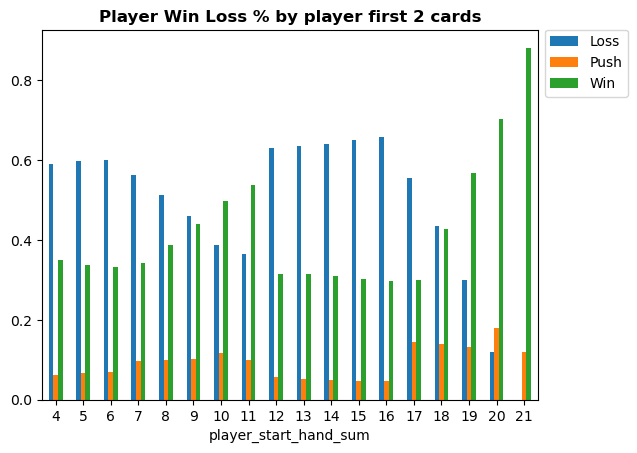

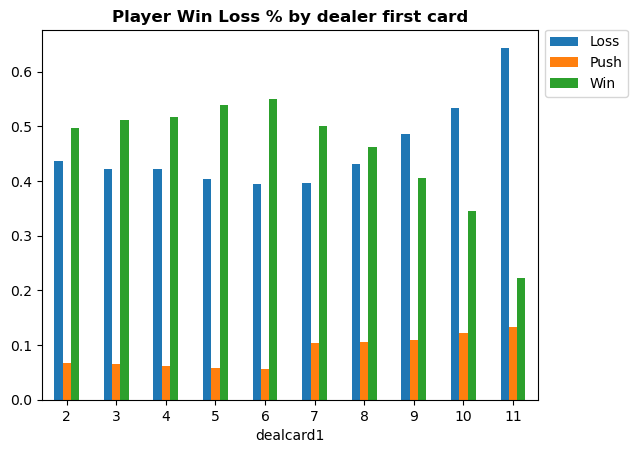

In [6]:
player_crosstab = pd.crosstab(df['player_start_hand_sum'],df['winloss'], normalize=0)
player_barplot = player_crosstab.plot.bar(rot=0)
player_barplot.set_title('Player Win Loss % by player first 2 cards', weight='bold')
player_barplot.legend(bbox_to_anchor=(1,1.02),loc='upper left')

dealer_crosstab = pd.crosstab(df['dealcard1'],df['winloss'], normalize=0)
dealer_barplot = dealer_crosstab.plot.bar(rot=0)
dealer_barplot.set_title('Player Win Loss % by dealer first card', weight='bold')
dealer_barplot.legend(bbox_to_anchor=(1,1.02),loc='upper left')

## Bust percentages based on starting hand

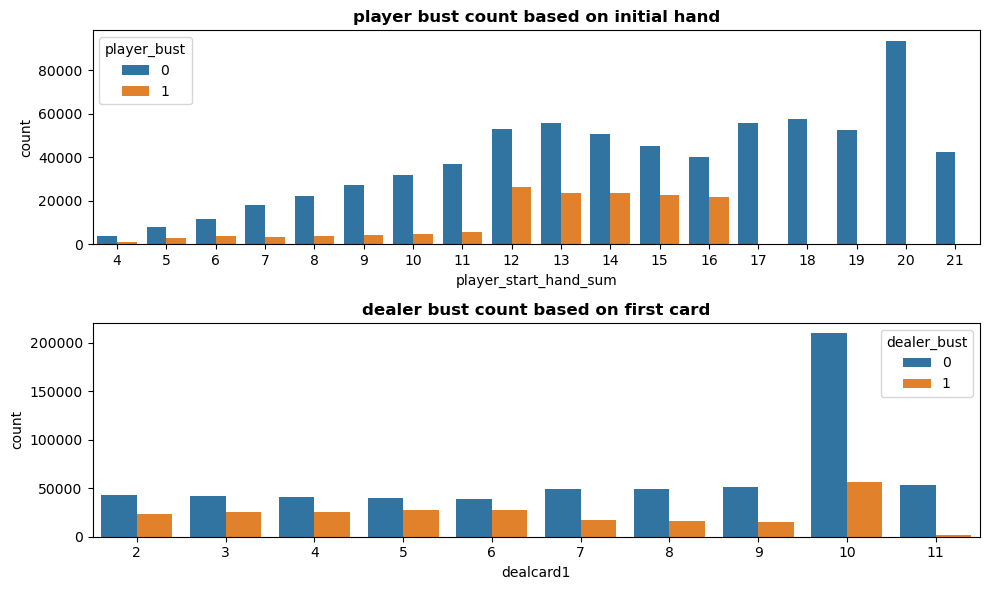

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
sns.countplot(data=df, x='player_start_hand_sum',hue='player_bust',ax=ax[0])
sns.countplot(data=df, x='dealcard1',hue='dealer_bust',ax=ax[1])
ax[0].set_title('player bust count based on initial hand',weight='bold')
ax[1].set_title('dealer bust count based on first card',weight='bold')
plt.tight_layout()

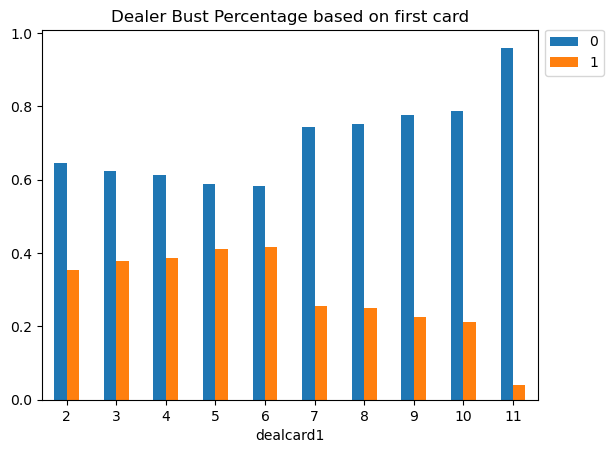

In [8]:
crosstab = pd.crosstab(df['dealcard1'],df['dealer_bust'],normalize=0)
barplot = crosstab.plot.bar(rot=0)
barplot.set_title('Dealer Bust Percentage based on first card')
barplot.legend(bbox_to_anchor=(1,1.02),loc='upper left')

## Player winLoss percentages based on if they had to hit or not

In [9]:
pd.crosstab(df['winloss'],df['player_hit'],normalize=0)

player_hit,0,1
winloss,,
Loss,0.760332,0.239668
Push,0.736390,0.263610
Win,0.741687,0.258313


# Machine Learning

## Update the winloss to be a binary output

In [10]:
new_df = df.copy()
new_df = pd.get_dummies(data=new_df,columns=['plybustbeat','dlbustbeat'])
new_df.head()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,...,plybustbeat_Beat,plybustbeat_Bust,plybustbeat_DlBust,plybustbeat_Plwin,plybustbeat_Push,dlbustbeat_Beat,dlbustbeat_Bust,dlbustbeat_Dlwin,dlbustbeat_PlBust,dlbustbeat_Push
0,7,10,0,0,0,17,10,8,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10,9,0,0,0,19,10,8,0,0,...,0,0,0,1,0,1,0,0,0,0
2,9,8,0,0,0,17,10,8,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2,10,0,5,0,17,10,8,0,0,...,1,0,0,0,0,0,0,1,0,0
4,10,2,0,5,0,17,10,8,0,0,...,1,0,0,0,0,0,0,1,0,0


In [11]:
new_df['winloss'].unique()

array(['Loss', 'Win', 'Push'], dtype=object)

In [12]:
new_df['bin_winloss'] = new_df['winloss'].apply(lambda x: 1 if x != 'Loss' else 0)
new_df['bin_winloss'].unique()

array([0, 1])

/var/folders/rr/0y3zp_rj7jx8n4c2t38_jfq40000gp/T/ipykernel_14682/2383352035.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table=grouped.pivot('ply2cardsum','dealcard1','bin_winloss')


Text(0.5, 1.0, 'Win Percentage')

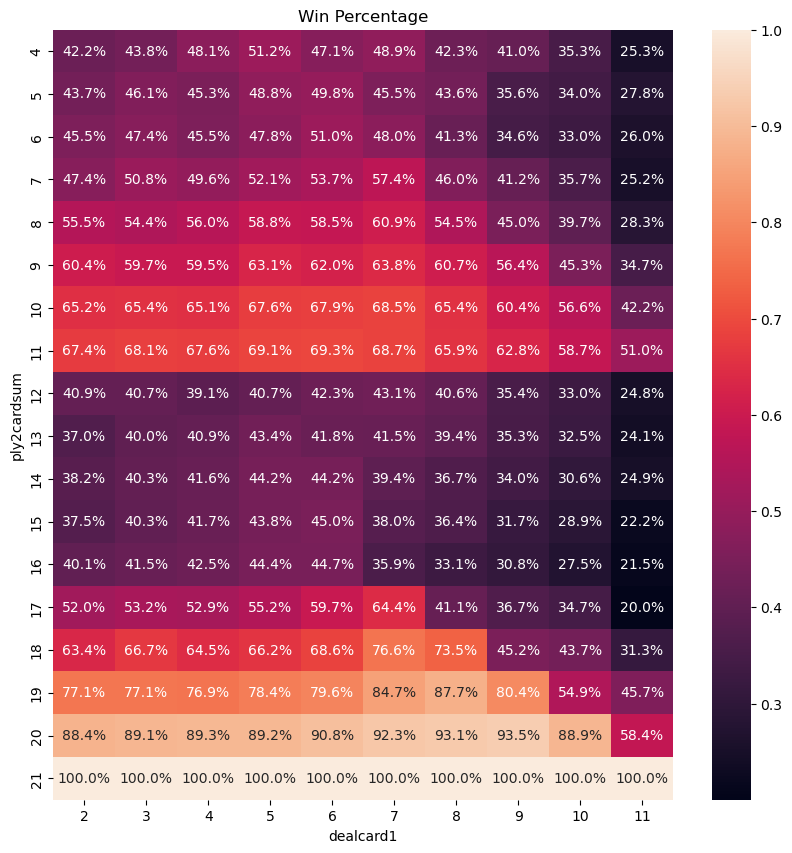

In [43]:
grouped = new_df.groupby(['ply2cardsum','dealcard1'])['bin_winloss'].mean().reset_index()
pivot_table=grouped.pivot('ply2cardsum','dealcard1','bin_winloss')

plt.figure(figsize=(10,10))
sns.heatmap(pivot_table,annot=True,fmt='.1%')
plt.title('Win Percentage')

## Train Models

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import time

In [14]:
features_1 = ['card1','card2','card3','card4','card5','dealcard1','ply2cardsum','sumofcards']
features = ['dealcard1','ply2cardsum']
X = new_df[features]
y = new_df['bin_winloss']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

start_time = time.time()

# Train the logistic regression model
print("====Training Logistic Regression Model====")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

print(f"Training Time: {time.time() - start_time} seconds")

# Classification report
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test,log_reg_pred))
start_time = time.time()

# Train a decision tree model
print('====Training Decision Tree Model====')
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(f"Training Time: {time.time() - start_time} seconds")

# Classification report
tree_pred = clf.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test,tree_pred))
start_time = time.time()

# Train the Gradient Boosting Machine
print('====Training Gradient Boosting Model====')
gbm = GradientBoostingClassifier()

gbm.fit(X_train,y_train)

print(f"Training Time: {time.time() - start_time} seconds")

# Classifcation Report
gbm_pred = gbm.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test,tree_pred))

====Training Logistic Regression Model====
Training Time: 0.722203254699707 seconds
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54     80776
           1       0.60      0.66      0.63     89995

    accuracy                           0.59    170771
   macro avg       0.59      0.58      0.58    170771
weighted avg       0.59      0.59      0.59    170771

====Training Decision Tree Model====
Training Time: 0.5030660629272461 seconds
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69     80776
           1       0.74      0.60      0.66     89995

    accuracy                           0.68    170771
   macro avg       0.69      0.68      0.68    170771
weighted avg       0.69      0.68      0.68    170771

====Training Gradient Boosting Model====
Training Time: 25.335837841033936 seconds
Gradient Boosting Cl

In [15]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, classification_report, confusion_matrix

In [16]:
def print_results(name,model,model_pred,X_test,y_test):
    # Classification report
    print(classification_report(y_test,model_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,model_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    # ROC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title(f"{name} ROC Curve")
    plt.show()
    
    # Precision-Recall Curve
    plot_precision_recall_curve(model, X_test, y_test)
    plt.title(f"{name} Precision-Recall Curve")
    plt.show()

## Find best parameters for decision tree

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.70     80776
           1       0.75      0.60      0.66     89995

    accuracy                           0.68    170771
   macro avg       0.69      0.68      0.68    170771
weighted avg       0.69      0.68      0.68    170771



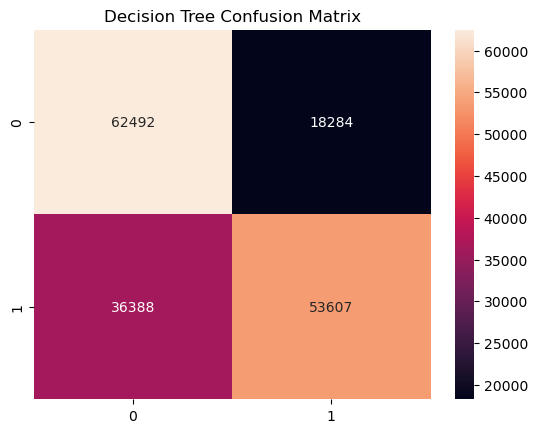

/Users/ml1000278614/opt/anaconda3/envs/cardGameSimVenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


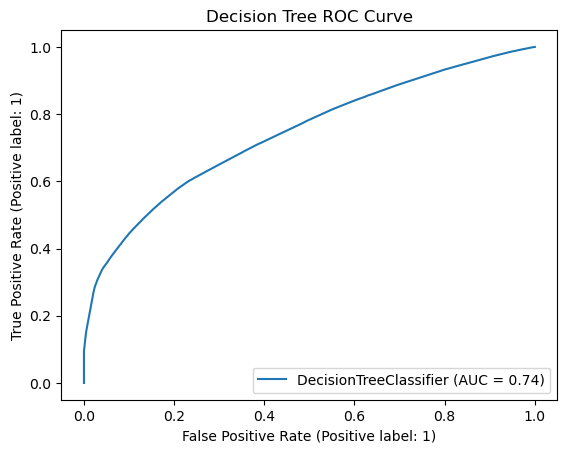

/Users/ml1000278614/opt/anaconda3/envs/cardGameSimVenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


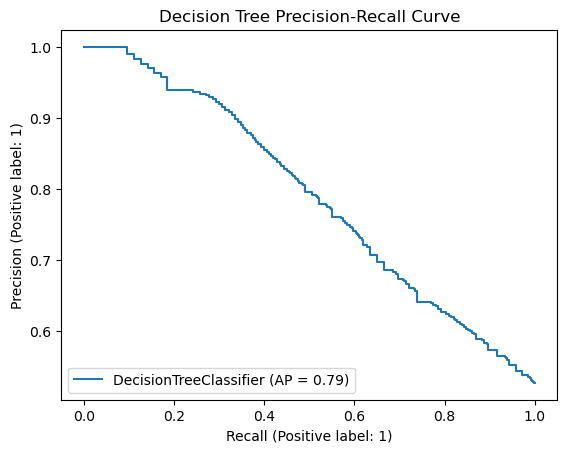

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10,20,30,40],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10,20],
}

# Create a base model
clf = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train,y_train)

tree_pred = clf.predict(X_test)

print(f'Decision Tree Report:')
print_results('Decision Tree',clf,tree_pred,X_test,y_test)

In [18]:
from sklearn.tree import export_text

tree_text = export_text(clf,feature_names=features)
print(tree_text)

|--- ply2cardsum <= 18.50
|   |--- dealcard1 <= 8.50
|   |   |--- ply2cardsum <= 11.50
|   |   |   |--- ply2cardsum <= 8.50
|   |   |   |   |--- ply2cardsum <= 7.50
|   |   |   |   |   |--- ply2cardsum <= 6.50
|   |   |   |   |   |   |--- dealcard1 <= 7.50
|   |   |   |   |   |   |   |--- dealcard1 <= 4.50
|   |   |   |   |   |   |   |   |--- dealcard1 <= 2.50
|   |   |   |   |   |   |   |   |   |--- ply2cardsum <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- ply2cardsum >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- dealcard1 >  2.50
|   |   |   |   |   |   |   |   |   |--- ply2cardsum <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- ply2cardsum >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- dealcard1 >  4.50
|   |   |   |   |   |   |   |   |--- dealcard1 <= 6.50
|   |   |   |   

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(683084, 2)
(170771, 2)
(683084,)
(170771,)


In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2023-06-30 10:56:39.104674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
model = Sequential(
    [
        Dense(30, activation='sigmoid',name='layer1'),
        Dense(30, activation='sigmoid',name='layer2'),
    ]
)

model.build(input_shape=(683084,2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (683084, 30)              90        
                                                                 
 layer2 (Dense)              (683084, 30)              930       
                                                                 
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
10674/10674 [==============================] - 10s 913us/step - loss: 0.6658 - accuracy: 0.6056 - val_loss: 0.6288 - val_accuracy: 0.6216
Epoch 2/10
10674/10674 [==============================] - 10s 918us/step - loss: 0.6223 - accuracy: 0.6267 - val_loss: 0.6143 - val_accuracy: 0.6271
Epoch 3/10
10674/10674 [==============================] - 10s 951us/step - loss: 0.6118 - accuracy: 0.6391 - val_loss: 0.6051 - val_accuracy: 0.6422
Epoch 4/10
10674/10674 [==============================] - 12s 1ms/step - loss: 0.6044 - accuracy: 0.6482 - val_loss: 0.5987 - val_accuracy: 0.6577
Epoch 5/10
10674/10674 [==============================] - 12s 1ms/step - loss: 0.5995 - accuracy: 0.6559 - val_loss: 0.5993 - val_accuracy: 0.6622
Epoch 6/10
10674/10674 [==============================] - 11s 1ms/step - loss: 0.5971 - accuracy: 0.6604 - val_loss: 0.5945 - val_accuracy: 0.6627
Epoch 7/10
10674/10674 [==============================] - 11s 1ms/step - loss: 0.5952 - accuracy: 0.6638 - val_l

/var/folders/rr/0y3zp_rj7jx8n4c2t38_jfq40000gp/T/ipykernel_14682/3992325962.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


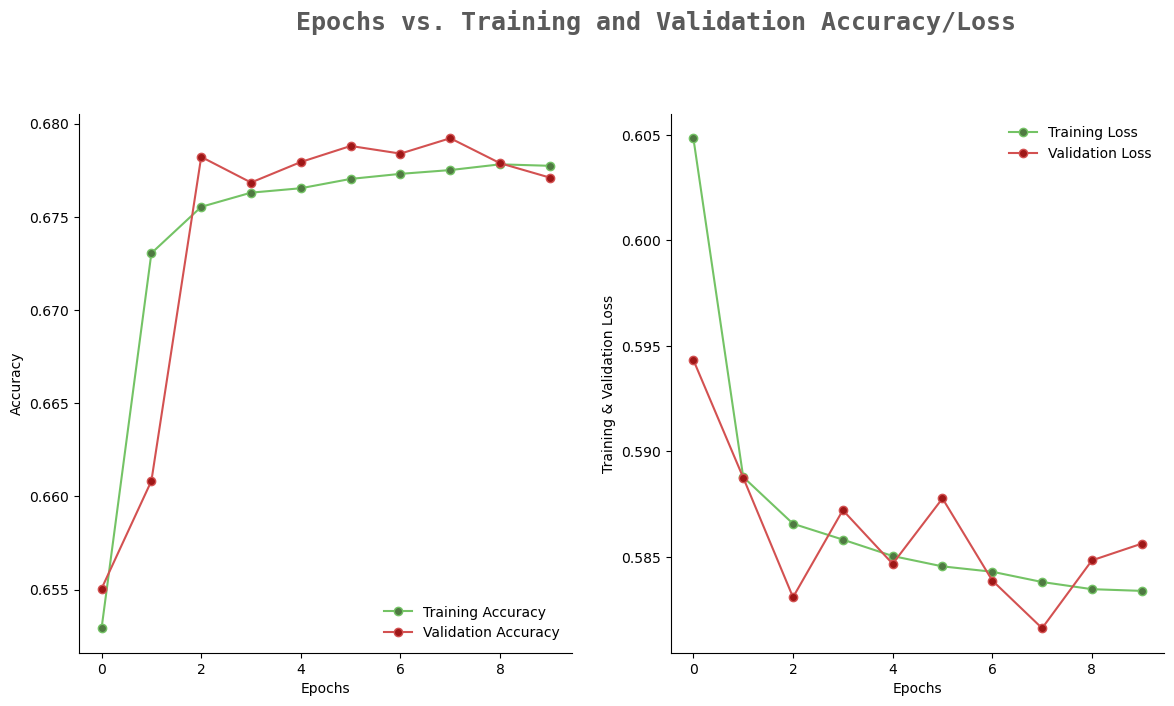

In [24]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()
